**Necessary Installments**

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.varmax import VARMAX
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from timeit import default_timer as timer
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount("/content/gDrive")

Mounted at /content/gDrive


In [ ]:
path="/content/gDrive/MyDrive/Datasets/new_csv_formatted.csv"
data=pd.read_csv(path)
data[:5]

,index,timestamp,vmMemoryDemand,guest_demand,guest_provisioned,vm_capacity_provisioned,effective_limit
0,0,11-11-2022 19:16,13844401.0,3838625.00,33554432,16799.99805,33815464
1,1,11-11-2022 19:21,13832758.0,3617164.25,33554432,16799.99805,33815464
2,2,11-11-2022 19:26,13834057.0,3051213.50,33554432,16799.99805,33815464
3,3,11-11-2022 19:31,13859266.0,3764804.50,33554432,16799.99805,33815464
4,4,11-11-2022 19:36,13867352.0,3174246.25,33554432,16799.99805,33815464


**Working on the data**

In [ ]:
df = data.copy()

In [ ]:
df[['vmMemoryDemand','guest_demand','guest_provisioned','vm_capacity_provisioned','effective_limit']] = df[['vmMemoryDemand','guest_demand','guest_provisioned','vm_capacity_provisioned','effective_limit']].astype(float)

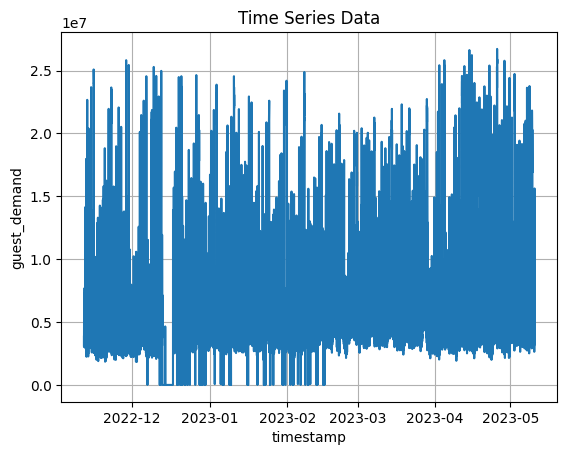

In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Step 3: Create the plot
plt.plot(df['timestamp'], df['guest_demand'])

# Step 4: Customize the plot (optional)
plt.xlabel('timestamp')
plt.ylabel('guest_demand')
plt.title('Time Series Data')
plt.grid(True)

# Step 5: Display the plot
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49933 entries, 0 to 49932
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   index                    49933 non-null  int64         
 1   timestamp                49933 non-null  datetime64[ns]
 2   vmMemoryDemand           49933 non-null  float64       
 3   guest_demand             49933 non-null  float64       
 4   guest_provisioned        49933 non-null  float64       
 5   vm_capacity_provisioned  49933 non-null  float64       
 6   effective_limit          49933 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 2.7 MB


**Checking Stationarity of the data**

In [ ]:
result = adfuller(df['vmMemoryDemand'].values)
#Extracting the values from the results:
print("Dickey-Fuller test for feature:vmMemoryDemand")

print('Test Statistic: %f' % result[0])

print('p-value: %f' % result[1])

print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] < result[4]["5%"]:
    print ("Reject H0 - Time Series is Stationary")
else:
    print ("Failed to Reject H0 - Time Series is Non-Stationary")

Dickey-Fuller test for feature:vmMemoryDemand
Test Statistic: -6.548676
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
Reject H0 - Time Series is Stationary


In [ ]:
result = adfuller(df['guest_demand'].values)
#Extracting the values from the results:
print("Dickey-Fuller test for feature:Guest Demand")

print('Test Statistic: %f' % result[0])

print('p-value: %f' % result[1])

print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] < result[4]["5%"]:
    print ("Reject H0 - Time Series is Stationary")
else:
    print ("Failed to Reject H0 - Time Series is Non-Stationary")

Dickey-Fuller test for feature:Guest Demand
Test Statistic: -21.284023
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
Reject H0 - Time Series is Stationary


In [ ]:
result = adfuller(df['guest_provisioned'].values)
#Extracting the values from the results:
print("Dickey-Fuller test for feature:guest_provisioned")

print('Test Statistic: %f' % result[0])

print('p-value: %f' % result[1])

print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] < result[4]["5%"]:
    print ("Reject H0 - Time Series is Stationary")
else:
    print ("Failed to Reject H0 - Time Series is Non-Stationary")

Dickey-Fuller test for feature:guest_provisioned
Test Statistic: nan
p-value: nan
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
Failed to Reject H0 - Time Series is Non-Stationary


In [ ]:
result = adfuller(df['vm_capacity_provisioned'].values)
#Extracting the values from the results:
print("Dickey-Fuller test for feature:vm_capacity_provisioned")

print('Test Statistic: %f' % result[0])

print('p-value: %f' % result[1])

print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] < result[4]["5%"]:
    print ("Reject H0 - Time Series is Stationary")
else:
    print ("Failed to Reject H0 - Time Series is Non-Stationary")

Dickey-Fuller test for feature:vm_capacity_provisioned
Test Statistic: -2.659702
p-value: 0.081275
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
Failed to Reject H0 - Time Series is Non-Stationary


In [ ]:
result = adfuller(df['effective_limit'].values)
#Extracting the values from the results:
print("Dickey-Fuller test for feature:effective_limit")

print('Test Statistic: %f' % result[0])

print('p-value: %f' % result[1])

print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] < result[4]["5%"]:
    print ("Reject H0 - Time Series is Stationary")
else:
    print ("Failed to Reject H0 - Time Series is Non-Stationary")

Dickey-Fuller test for feature:effective_limit
Test Statistic: -6.947140
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
Reject H0 - Time Series is Stationary


**Solving the problem of Non-stationarity**

In [ ]:
df['guestprov_diff'] = df['guest_provisioned'].diff()
df['vmcap_diff'] = df['vm_capacity_provisioned'].diff()

In [ ]:
df = df.dropna()

In [ ]:
df.shape

(49932, 9)

In [ ]:
data_uti=df[['timestamp','vmMemoryDemand','guest_demand','guest_provisioned','vm_capacity_provisioned','effective_limit']]

In [ ]:
data_uti[:2]

,timestamp,vmMemoryDemand,guest_demand,guest_provisioned,vm_capacity_provisioned,effective_limit
1,2022-11-11 19:21:00,13832758.0,3617164.25,33554432.0,16799.99805,33815464.0
2,2022-11-11 19:26:00,13834057.0,3051213.50,33554432.0,16799.99805,33815464.0


In [ ]:
data_uti.rename(
    columns={"guestprov_diff": "guest_provisioned","vmcap_diff": "vm_capacity_provisioned"},
    inplace=True,
)

In [ ]:
data_uti=data_uti.reset_index(drop=True)
data_uti[:2]

,timestamp,vmMemoryDemand,guest_demand,guest_provisioned,vm_capacity_provisioned,effective_limit
0,2022-11-11 19:21:00,13832758.0,3617164.25,33554432.0,16799.99805,33815464.0
1,2022-11-11 19:26:00,13834057.0,3051213.50,33554432.0,16799.99805,33815464.0


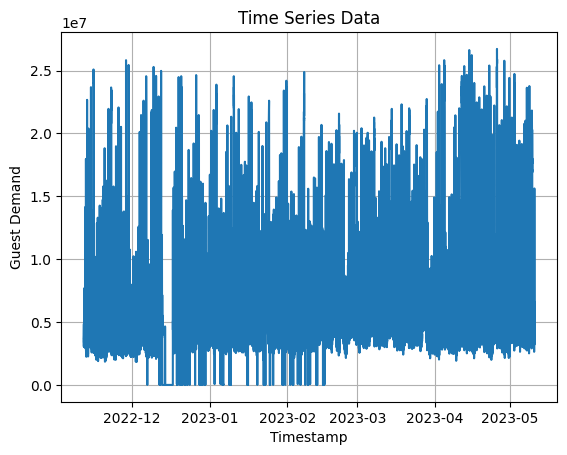

In [ ]:
plt.plot(data_uti['timestamp'], data_uti['guest_demand'])

# Step 4: Customize the plot (optional)
plt.xlabel('Timestamp')
plt.ylabel('Guest Demand')
plt.title('Time Series Data')
plt.grid(True)

# Step 5: Display the plot
plt.show()

**Performing DF Test again**

In [ ]:
result = adfuller(data_uti['vmMemoryDemand'].values)
#Extracting the values from the results:
print("Dickey-Fuller test for feature:vmMemoryDemand after Differencing")

print('Test Statistic: %f' % result[0])

print('p-value: %f' % result[1])

print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] < result[4]["5%"]:
    print ("Reject H0 - Time Series is Stationary")
else:
    print ("Failed to Reject H0 - Time Series is Non-Stationary")

Dickey-Fuller test for feature:vmMemoryDemand after Differencing
Test Statistic: -6.548532
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
Reject H0 - Time Series is Stationary


In [ ]:
result = adfuller(data_uti['guest_demand'].values)
#Extracting the values from the results:
print("Dickey-Fuller test for feature:guestDemand after Differencing")

print('Test Statistic: %f' % result[0])

print('p-value: %f' % result[1])

print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] < result[4]["5%"]:
    print ("Reject H0 - Time Series is Stationary")
else:
    print ("Failed to Reject H0 - Time Series is Non-Stationary")

Dickey-Fuller test for feature:guestDemand after Differencing
Test Statistic: -21.282820
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
Reject H0 - Time Series is Stationary


In [ ]:
result = adfuller(data_uti['guest_provisioned'].values)
#Extracting the values from the results:
print("Dickey-Fuller test for feature:guest_provisioned after Differencing")

print('Test Statistic: %f' % result[0])

print('p-value: %f' % result[1])

print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] < result[4]["5%"]:
    print ("Reject H0 - Time Series is Stationary")
else:
    print ("Failed to Reject H0 - Time Series is Non-Stationary")

Dickey-Fuller test for feature:guest_provisioned after Differencing
Test Statistic: nan
p-value: nan
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
Failed to Reject H0 - Time Series is Non-Stationary


In [ ]:
result = adfuller(data_uti['vm_capacity_provisioned'].values)
#Extracting the values from the results:
print("Dickey-Fuller test for feature:vm_capacity_provisioned after Differencing")

print('Test Statistic: %f' % result[0])

print('p-value: %f' % result[1])

print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] < result[4]["5%"]:
    print ("Reject H0 - Time Series is Stationary")
else:
    print ("Failed to Reject H0 - Time Series is Non-Stationary")

Dickey-Fuller test for feature:vm_capacity_provisioned after Differencing
Test Statistic: -2.659712
p-value: 0.081273
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
Failed to Reject H0 - Time Series is Non-Stationary


In [ ]:
result = adfuller(data_uti['effective_limit'].values)
#Extracting the values from the results:
print("Dickey-Fuller test for feature:effective_limit after Differencing")

print('Test Statistic: %f' % result[0])

print('p-value: %f' % result[1])

print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] < result[4]["5%"]:
    print ("Reject H0 - Time Series is Stationary")
else:
    print ("Failed to Reject H0 - Time Series is Non-Stationary")

Dickey-Fuller test for feature:effective_limit after Differencing
Test Statistic: -6.947073
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
Reject H0 - Time Series is Stationary


**Performing the Johansen Cointegration Test**

In [ ]:
result = coint_johansen(data_uti.drop('timestamp',axis=1), det_order=0, k_ar_diff=1)

**Auto-ARIMA method**

In [ ]:
split_date = pd.to_datetime('02-12-2023  11:33:00')

# Split the dataset into train and test
train_data = data_uti[data_uti['timestamp'] <= split_date]
test_data = data_uti[data_uti['timestamp'] > split_date]

# Optional: Reset the index
train_data = train_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

In [ ]:
target_variable_vmd = 'vmMemoryDemand'

# Extract the time series data for the target variable
ts_open = train_data[target_variable_vmd]

# Apply auto_arima to find the best ARIMA model
stepwise_model_vmd = auto_arima(ts_open, trace=True,
                            error_action='ignore', suppress_warnings=True, stepwise=True)

# Print the summary of the best model
print(stepwise_model_vmd.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=771626.578, Time=34.42 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=777076.858, Time=0.72 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=775332.896, Time=1.91 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=773982.800, Time=4.78 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=777074.858, Time=0.74 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=771656.243, Time=10.63 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=771696.260, Time=13.17 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=771599.280, Time=17.50 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=771670.634, Time=17.71 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=771601.132, Time=22.91 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=771587.934, Time=28.75 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=771589.498, Time=28.69 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=771586.045, Time=94.35 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=771582.373, Time=44.15

In [ ]:
target_variable_open = 'guest_demand'

# Extract the time series data for the target variable
ts_open = train_data[target_variable_open]

# Apply auto_arima to find the best ARIMA model
stepwise_model_open = auto_arima(ts_open, trace=True,
                            error_action='ignore', suppress_warnings=True, stepwise=True)

# Print the summary of the best model
print(stepwise_model_open.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=780100.912, Time=18.59 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=782400.583, Time=0.91 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=782359.357, Time=1.60 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=782327.043, Time=2.79 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=782398.583, Time=0.43 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=780099.128, Time=10.74 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=780765.763, Time=5.33 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=780556.305, Time=10.61 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=780099.206, Time=20.16 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=780185.102, Time=8.32 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=780134.520, Time=12.94 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=780049.559, Time=40.36 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=780044.978, Time=54.45 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=66.89 sec
 ARI

In [ ]:
target_variable_gp = 'guest_provisioned'

# Extract the time series data for the target variable
ts_open = train_data[target_variable_gp]

# Apply auto_arima to find the best ARIMA model
stepwise_model_gp = auto_arima(ts_open, trace=True,
                            error_action='ignore', suppress_warnings=True, stepwise=True)

# Print the summary of the best model
print(stepwise_model_gp.summary())

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=937382.902, Time=0.31 sec
Total fit time: 0.310 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                25000
Model:                        SARIMAX   Log Likelihood             -468690.451
Date:                Mon, 26 Jun 2023   AIC                         937382.902
Time:                        10:52:50   BIC                         937391.029
Sample:                             0   HQIC                        937385.533
                              - 25000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.126e+15   1.28e+29   8.78e-15      1.000   -2.51e+29    2.51e+29
Ljung-Box (L1) (Q):              

In [ ]:
target_variable_vmcp = 'vm_capacity_provisioned'

# Extract the time series data for the target variable
ts_open = train_data[target_variable_vmcp]

# Apply auto_arima to find the best ARIMA model
stepwise_model_vmcp = auto_arima(ts_open, trace=True,
                            error_action='ignore', suppress_warnings=True, stepwise=True)

# Print the summary of the best model
print(stepwise_model_vmcp.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-459270.531, Time=26.67 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-459278.532, Time=9.59 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-459276.532, Time=8.61 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-459276.532, Time=17.78 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-459084.871, Time=4.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-459274.532, Time=16.83 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 83.539 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                25000
Model:               SARIMAX(0, 1, 0)   Log Likelihood              229641.266
Date:                Mon, 26 Jun 2023   AIC                        -459278.532
Time:                        10:55:46   BIC                        -459262.279
Sample:                             0   HQIC                       

In [ ]:
target_variable_el = 'effective_limit'

# Extract the time series data for the target variable
ts_open = train_data[target_variable_el]

# Apply auto_arima to find the best ARIMA model
stepwise_model_el = auto_arima(ts_open, trace=True,
                            error_action='ignore', suppress_warnings=True, stepwise=True)

# Print the summary of the best model
print(stepwise_model_el.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=571456.580, Time=7.53 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=571048.432, Time=0.72 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=571074.808, Time=2.60 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=571146.012, Time=12.75 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=571046.432, Time=0.42 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=571247.158, Time=24.68 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 48.749 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                25000
Model:               SARIMAX(0, 1, 0)   Log Likelihood             -285522.216
Date:                Mon, 26 Jun 2023   AIC                         571046.432
Time:                        10:57:10   BIC                         571054.558
Sample:                             0   HQIC                        571049

PHASE II

In [ ]:
target_variable_open = 'guest_demand'
ts_high = train_data[target_variable_open]

best_model_high= auto_arima(ts_high, start_p=0, d=1, start_q=0,
           max_p=5, max_d=2, max_q=3, seasonal=False,
           trace=True, suppress_warnings=True, stepwise=False)

print(best_model_high.summary())

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=782400.583, Time=0.73 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=782327.043, Time=3.55 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=780765.763, Time=6.22 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=780185.102, Time=6.83 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=782359.357, Time=2.75 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=780556.305, Time=9.39 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=780099.128, Time=10.93 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=780099.206, Time=20.27 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=781270.592, Time=3.25 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=780134.520, Time=13.47 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=780100.912, Time=18.24 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=780049.559, Time=39.95 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=780831.134, Time=4.24 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=780094.328, Time=21.08 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=

**FORECASTING**

In [ ]:
forecast=best_model_high.predict(n_periods=10000, return_conf_int=True)

In [ ]:
forecast

(25000    3.303662e+06
 25001    3.391620e+06
 25002    3.435325e+06
 25003    3.453003e+06
 25004    3.463565e+06
              ...     
 34995    2.698172e+06
 34996    2.698095e+06
 34997    2.698018e+06
 34998    2.697940e+06
 34999    2.697863e+06
 Length: 10000, dtype: float64,
 array([[ 4.66631855e+05,  6.14069120e+06],
        [-4.03530906e+05,  7.18677136e+06],
        [-7.68651184e+05,  7.63930190e+06],
        ...,
        [-1.09054171e+08,  1.14450206e+08],
        [-1.09059830e+08,  1.14455711e+08],
        [-1.09065489e+08,  1.14461215e+08]]))

In [ ]:
predicted_values = forecast[0]

In [ ]:
rmse = np.sqrt(mean_squared_error(test_data['guest_demand'][:10000], predicted_values))
print("RMSE:", rmse)

RMSE: 3952971.0689793904


**Visualization of the Forecast**

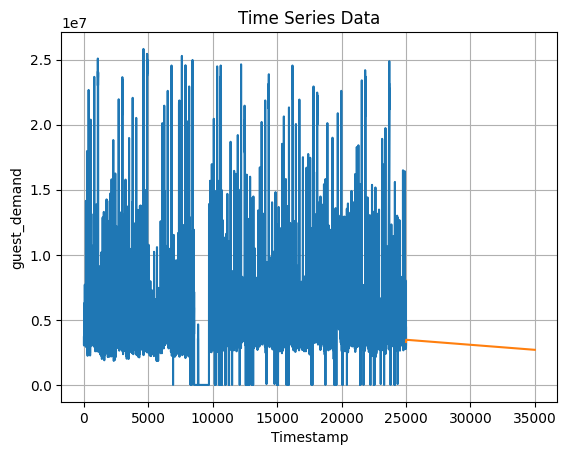

In [ ]:
plt.plot(train_data['guest_demand'])
plt.plot(predicted_values)

# Step 4: Customize the plot (optional)
plt.xlabel('Timestamp')
plt.ylabel('guest_demand')
plt.title('Time Series Data')
plt.grid(True)

# Step 5: Display the plot
plt.show()